In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

### 1.1.1   Import and view the data. How many columns do you have? Which columns will you use in your PCA?

In [2]:
pottery = pd.read_csv('Pottery.csv')
pottery

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [3]:
pottery.shape

(26, 7)

#### There are 7 columns in total (including the original index in the csv. file), we only need 'Al','Fe', 'Mg','Ca','Na' for PCA.

In [4]:
df = pottery.drop(['Unnamed: 0'],axis=1)
#df.set_index('Site',inplace=True)
df.set_index('Site',inplace=True)
#pottery_scaled = StandardScaler().fit_transform(pottery)   #pre-process
df

,Al,Fe,Mg,Ca,Na
Site,,,,,
Llanedyrn,14.4,7.00,4.30,0.15,0.51
Llanedyrn,13.8,7.08,3.43,0.12,0.17
Llanedyrn,14.6,7.09,3.88,0.13,0.20
Llanedyrn,11.5,6.37,5.64,0.16,0.14
Llanedyrn,13.8,7.06,5.34,0.20,0.20
Llanedyrn,10.9,6.26,3.47,0.17,0.22
Llanedyrn,10.1,4.26,4.26,0.20,0.18
Llanedyrn,11.6,5.78,5.91,0.18,0.16
Llanedyrn,11.1,5.49,4.52,0.29,0.30


### 1.1.2  Pre-process the data and perform PCA with 3 PCs.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=3, svd_solver='full')
PC_scores = pca.fit_transform(df_scaled)  

In [6]:
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = df.index)
scores_pd

,PC1,PC2,PC3
Site,,,
Llanedyrn,-1.778026,2.289445,-0.075289
Llanedyrn,-0.611193,0.122065,-0.499044
Llanedyrn,-0.722428,0.370209,-0.207550
Llanedyrn,-1.417696,-0.555600,-0.557590
Llanedyrn,-1.486801,-0.004081,0.195248
Llanedyrn,-1.259044,-0.092347,-0.783259
Llanedyrn,-1.180703,-0.607921,-0.575010
Llanedyrn,-1.490385,-0.498745,-0.336582
Llanedyrn,-2.076010,0.000500,0.220714


In [7]:
loadings_pd = pd.DataFrame(data = pca.components_.T    #pca.components_ = 3*28
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = df.columns)
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


### 1.1.3  Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?

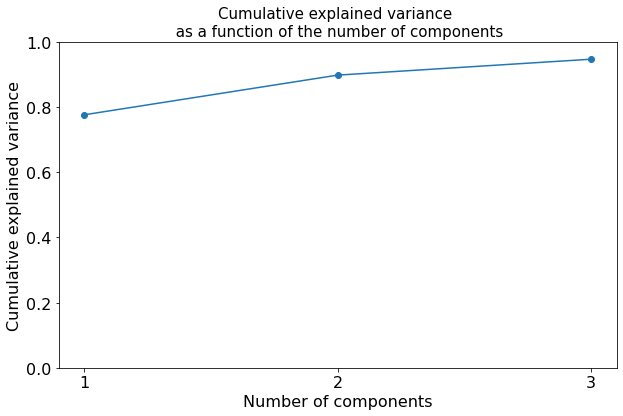

The first 2 components describe 89.73213663789889% of the variance.
The first 3 components describe 94.61598027980747% of the variance.


In [8]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16);
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=15)
plt.tick_params(labelsize=16)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0,1)
plt.show()
print("The first 2 components describe {}% of the variance.".format(np.cumsum(pca.explained_variance_ratio_)[1]*100))
print("The first 3 components describe {}% of the variance.".format(np.cumsum(pca.explained_variance_ratio_)[2]*100))

### 1.1.4   Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

In [10]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        #define different colors for diffrent sites
        color = 'purple' if label=='Llanedyrn' else 'black' if label=='Caldicot' else 'green' if label=='IsleThorns' else 'blue'
        plt.text(x, y, label, ha='center', size=11,color = color)
        
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0]*0.8, p_scaled[i,1]*0.8, color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0]*0.8, p_scaled[i,1]*0.8, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0]*0.8, p_scaled[i,1]*0.8, loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

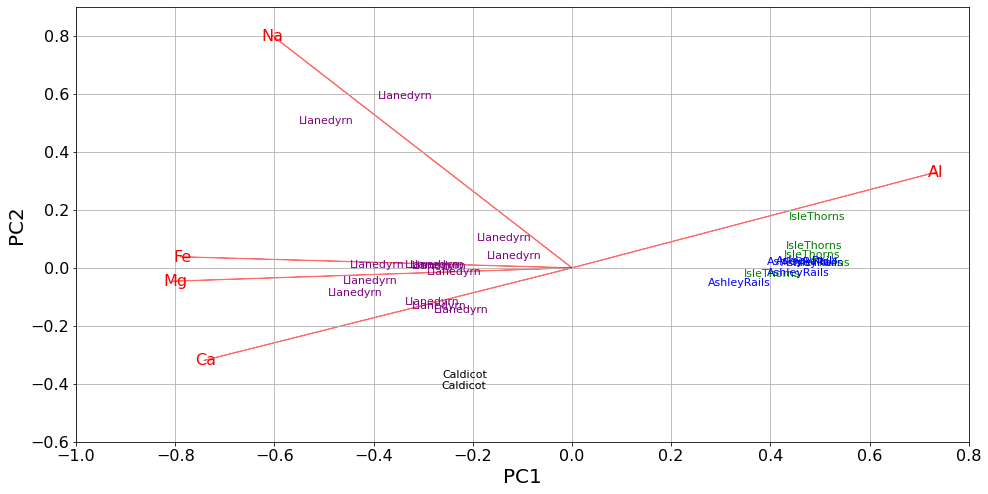

In [11]:
plt.rcParams["figure.figsize"] = [16,8]
myplot(PC_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(-1,0.8)
plt.ylim(-0.6,0.9)
plt.show()

### 1.1.5 How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

From the map above, Al moves in the same direction as neither of the others, as it is negively correlated with them, especially with  Ca, as the angle between the two is 180 degree.
Isle Thorns and Ashley Rails are closer to each other in the biplot, and locate around the postive direction of the line of Al, indicating they are similar and have more Al in component and barely have Na, Mg, Feso or Ca. So the raw material from the two site can be used to manufacture Product B, which is more like a Aluminum product.

### 1.1.6  Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?

No, I do not think the raw material from Caldicot is a good replacement for Llanedyrn. Although they are closer to each other if we compare them with the materials from Isle Thorns and Ashley Rails, but Isle Thorns and Ashley Rails are providers of product B only.

As many of the raw materials from Llanedyrn are located around the posivie directions of Na, Fe or Ca, indicating many of them contain some levels of these components, but the two samples from caldicot barely contain Na, and the level of Fe or Mg seems not high enough, so they are not simiar in composition with the raw materials from the Llanedyrn. 

### 1.1.7   What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?

The two big clusters are the [Caldicot, Llanedyrn] and [Isle Thorns, Ashley Rails], which are the providers(or candidate prodivider,actually) of Product A and Product B respectively. I think the biggest difference is the composition of Al. As Al and other vectors diverge, and the angle between Al and either of the others is more than 90 degree, we say Al and Ca, Mg or Fe are highly negatively correlated, especially with Ca becasue the angle seems to be 180 degree. This means the raw material with higher content in Al will contain less Ca, Mg, Fe or Na, and vice versa.

As mentioned above, if we project the two samples from Caldico onto the Na vector within the biplot, they barely contain Na, but Na is contained in the Llanedyrn samples and may take a large amount of the content for some of them.

### 1.1.8   Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

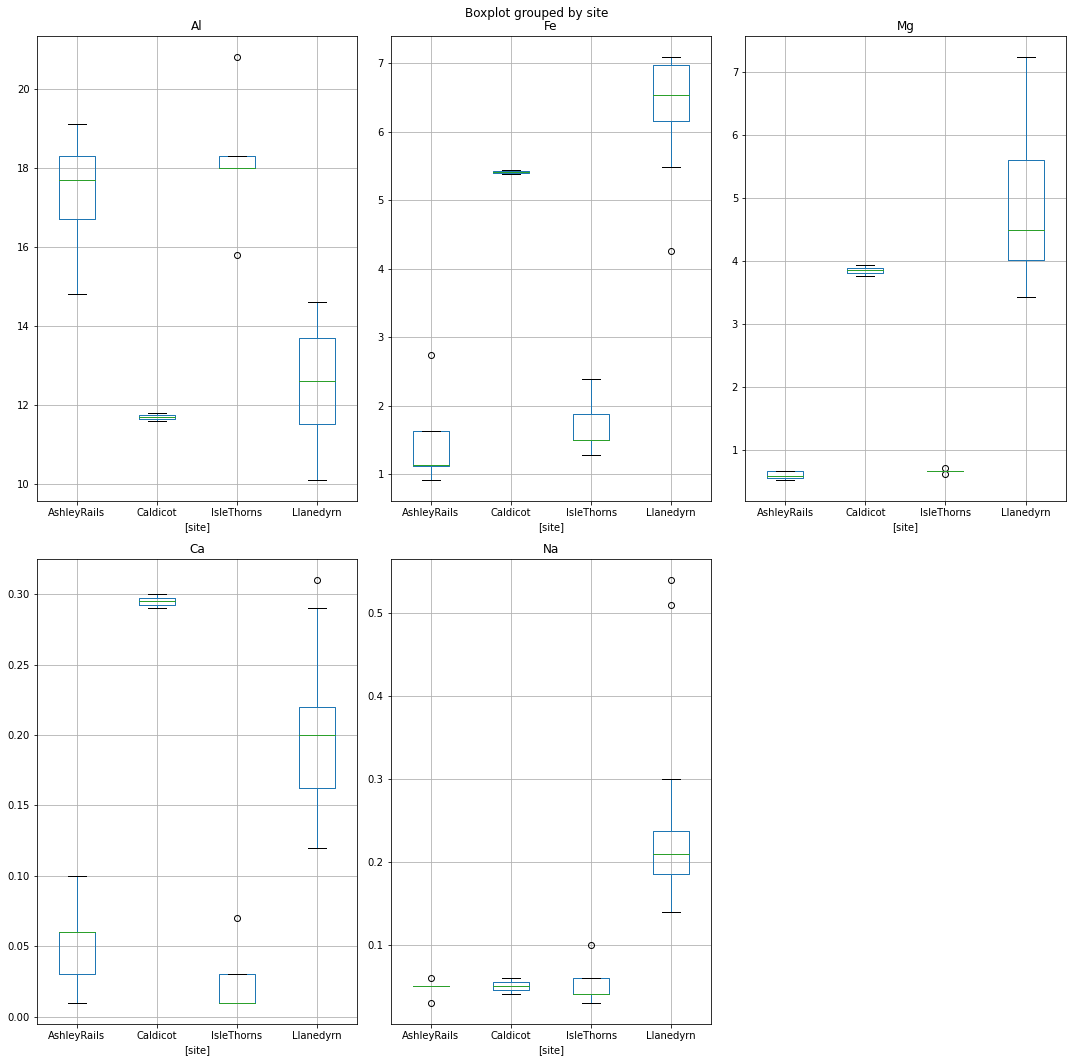

In [12]:
df_new = df.copy()
df_new['site']=df.index
fig, axes = plt.subplots(2,3,figsize=(15,15))
n=0
for i in df.columns:
    df_new[[i,'site']].boxplot(by = 'site',ax=axes.flatten()[n])
    n+=1

fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout() 

plt.show()

From the boxplots, we could see the the materials from Isle Thorns and Ashley Rails are similar. The caldicot samples are different with Llanedyrn samples as they contained much less Na, and slightly more Ca, which is not captured in the above step.